In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df=pd.read_csv("weatherAUS.csv")

In [52]:
df["MinTemp"].fillna(value=np.mean(df["MinTemp"]),inplace=True)
df["MaxTemp"].fillna(value=np.mean(df["MaxTemp"]),inplace=True)
df["Humidity9am"].fillna(value=np.mean(df["Humidity9am"]),inplace=True)
df["Humidity3pm"].fillna(value=np.mean(df["Humidity3pm"]),inplace=True)
df["Temp9am"].fillna(value=np.mean(df["Temp9am"]),inplace=True)
df["Temp3pm"].fillna(value=np.mean(df["Temp3pm"]),inplace=True)
df["WindSpeed9am"].fillna(value=np.mean(df["WindSpeed9am"]),inplace=True)
df["WindSpeed3pm"].fillna(value=np.mean(df["WindSpeed3pm"]),inplace=True)
df["Pressure9am"].fillna(value=np.mean(df["Pressure9am"]),inplace=True)
df["Pressure3pm"].fillna(value=np.mean(df["Pressure3pm"]),inplace=True)
df["Rainfall"].fillna(value=np.mean(df["Rainfall"]),inplace=True)
df["WindGustSpeed"].fillna(value=np.mean(df["WindGustSpeed"]),inplace=True)
df["Evaporation"].fillna(value=np.mean(df["Evaporation"]),inplace=True)
df.drop("Sunshine",axis=1,inplace=True)
df.drop(["Cloud9am","Cloud3pm"],axis=1,inplace=True)
df.drop(["WindDir3pm","WindDir9am"],axis=1,inplace=True)
df.drop("WindGustDir",axis=1,inplace=True)

In [53]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [54]:
def converter(x):
    if(x=="Yes"):
        return 1
    else:
        return 0

In [55]:
df["RTod"]=df["RainToday"].apply(converter)
df["RTom"]=df["RainTomorrow"].apply(converter)

In [56]:
df["RainTomorrow"].value_counts()
df["RainTomorrow"].isna().value_counts()
df["RainTomorrow"].dropna(inplace=True)

<AxesSubplot:>

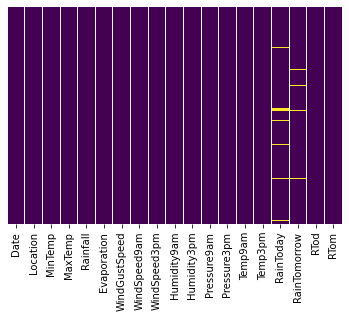

In [57]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [74]:
data=df.drop(["Date","Location","RainToday","RainTomorrow","Evaporation"],axis=1)

<AxesSubplot:>

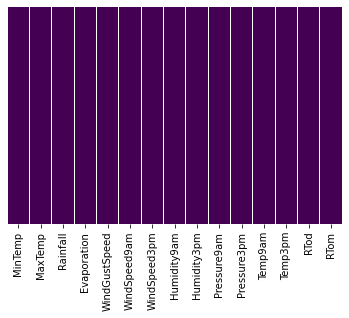

In [59]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()

In [75]:
scaler.fit(data.drop("RTom",axis=1))

StandardScaler()

In [76]:
scaled_features=scaler.transform(data.drop("RTom",axis=1))

In [77]:
df_feat=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [78]:
df_feat.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RTod
0,0.189447,-0.045336,-0.210072,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,-0.014053,0.017023,-0.529795
1,-0.753101,0.265043,-0.281650,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.032464,0.381985,-0.529795
2,0.110901,0.349692,-0.281650,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,0.621685,0.221402,-0.529795
3,-0.470337,0.674180,-0.281650,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,0.172017,0.703151,-0.529795
4,0.833521,1.280830,-0.162353,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.125499,1.170302,-0.529795


In [66]:
from sklearn.model_selection import train_test_split

In [79]:
X=df_feat
y=data["RTom"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier(n_neighbors=2)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [82]:
pred=knn.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[35867  1500]
 [ 7308  3327]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89     37367
           1       0.69      0.31      0.43     10635

    accuracy                           0.82     48002
   macro avg       0.76      0.64      0.66     48002
weighted avg       0.80      0.82      0.79     48002



In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))